# S08 T01: Tasca Feature Engineering

Aprèn a gestionar paràmetres amb Python.  

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
winter_df = pd.read_csv('winter.csv')
winter_df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold
...,...,...,...,...,...,...,...,...,...
5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


In [21]:
winter_df_dummies = pd.get_dummies(winter_df, columns=["Gender"], prefix="Sex")
winter_df_dummies

,Year,City,Sport,Discipline,Athlete,Country,Event,Medal,Sex_Men,Sex_Women
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Military Patrol,Bronze,1,0
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Military Patrol,Bronze,1,0
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Military Patrol,Bronze,1,0
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Military Patrol,Bronze,1,0
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Military Patrol,Gold,1,0
...,...,...,...,...,...,...,...,...,...,...
5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Slopestyle,Bronze,0,1
5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Slopestyle,Gold,0,1
5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Snowboard Cross,Silver,0,1
5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Snowboard Cross,Gold,0,1


In [19]:
#Creem un DataFrame amb les columnes categòriques
small_winter_df = winter_df[['Medal','Gender']]
small_winter_df.T

,0,1,2,3,4,5,6,7,8,9,...,5760,5761,5762,5763,5764,5765,5766,5767,5768,5769
Medal,Bronze,Bronze,Bronze,Bronze,Gold,Gold,Gold,Gold,Silver,Silver,...,Gold,Gold,Silver,Bronze,Silver,Bronze,Gold,Silver,Gold,Bronze
Gender,Men,Men,Men,Men,Men,Men,Men,Men,Men,Men,...,Women,Women,Women,Women,Women,Women,Women,Women,Women,Women


In [33]:
small_winter_df_dummies = pd.get_dummies(small_winter_df.Gender)
small_winter_df_dummies.T

,0,1,2,3,4,5,6,7,8,9,...,5760,5761,5762,5763,5764,5765,5766,5767,5768,5769
Men,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Women,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [34]:
small_winter_df_dummies_2 = pd.get_dummies(small_winter_df)
small_winter_df_dummies_2.T

,0,1,2,3,4,5,6,7,8,9,...,5760,5761,5762,5763,5764,5765,5766,5767,5768,5769
Medal_Bronze,1,1,1,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
Medal_Gold,0,0,0,0,1,1,1,1,0,0,...,1,1,0,0,0,0,1,0,1,0
Medal_Silver,0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,1,0,0,1,0,0
Gender_Men,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Gender_Women,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [31]:
#Com al nostre DataSet no tenim dades numèriques, transformem una mica les dades...
athletes_year = winter_df.groupby(['Year'])[["Athlete"]].nunique().reset_index()
athletes_year.T

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
Year,1924,1928,1932,1936,1948,1952,1956,1960,1964,1968,...,1980,1984,1988,1992,1994,1998,2002,2006,2010,2014
Athlete,103,83,106,95,128,116,131,131,156,167,...,185,182,215,270,281,386,410,448,450,509


In [32]:
#Com al nostre DataSet no tenim dades numèriques, transformem una mica les dades...
medals_year = winter_df.groupby(['Year'])[["Medal"]].count().reset_index()
medals_year.T

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
Year,1924,1928,1932,1936,1948,1952,1956,1960,1964,1968,...,1980,1984,1988,1992,1994,1998,2002,2006,2010,2014
Medal,118,89,116,108,140,136,150,147,185,199,...,218,222,264,325,343,447,481,531,529,612


In [41]:
new_winter_df = medals_year.merge(athletes_year, on='Year', how="left")
new_winter_df.T

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
Year,1924,1928,1932,1936,1948,1952,1956,1960,1964,1968,...,1980,1984,1988,1992,1994,1998,2002,2006,2010,2014
Medal,118,89,116,108,140,136,150,147,185,199,...,218,222,264,325,343,447,481,531,529,612
Athlete,103,83,106,95,128,116,131,131,156,167,...,185,182,215,270,281,386,410,448,450,509


## Nivell 1
### * Exercici 1

Agafa un conjunt de dades de tema esportiu que t'agradi i...:  
 * Normalitza els atributs categòrics en dummy. 
 * Estandaritza els atributs numèrics amb StandardScaler.

In [32]:
from sklearn.preprocessing import StandardScaler
  
object= StandardScaler()
 
# standardization 
scale = object.fit_transform(small_winter_df_dummies_2) 
print(scale)

[[ 1.41660664 -0.7064635  -0.70894581  0.68042762 -0.68042762]
 [ 1.41660664 -0.7064635  -0.70894581  0.68042762 -0.68042762]
 [ 1.41660664 -0.7064635  -0.70894581  0.68042762 -0.68042762]
 ...
 [-0.70591227 -0.7064635   1.41054504 -1.46966404  1.46966404]
 [-0.70591227  1.4155013  -0.70894581 -1.46966404  1.46966404]
 [ 1.41660664 -0.7064635  -0.70894581 -1.46966404  1.46966404]]


In [40]:
object= StandardScaler()
 
# standardization 
scale = object.fit_transform(new_winter_df) 
print(scale)

[[-1.78570063 -0.92857523 -0.92409099]
 [-1.63689224 -1.11522646 -1.078633  ]
 [-1.48808385 -0.94144773 -0.90090969]
 [-1.33927547 -0.99293772 -0.98590779]
 [-0.89285031 -0.78697775 -0.73091347]
 [-0.74404193 -0.81272275 -0.82363868]
 [-0.59523354 -0.72261526 -0.70773217]
 [-0.44642516 -0.741924   -0.70773217]
 [-0.29761677 -0.49734653 -0.51455466]
 [-0.14880839 -0.40723904 -0.42955655]
 [ 0.         -0.40080279 -0.40637525]
 [ 0.14880839 -0.3364403  -0.36773974]
 [ 0.29761677 -0.28495031 -0.29046874]
 [ 0.44642516 -0.25920531 -0.31365004]
 [ 0.59523354  0.01111716 -0.05865572]
 [ 0.74404193  0.40372836  0.36633482]
 [ 0.81844612  0.51958085  0.45133292]
 [ 0.96725451  1.18895077  1.26267849]
 [ 1.11606289  1.40778324  1.44812891]
 [ 1.26487128  1.72959571  1.74175873]
 [ 1.41367966  1.71672321  1.75721293]
 [ 1.56248805  2.2509319   2.21311187]]


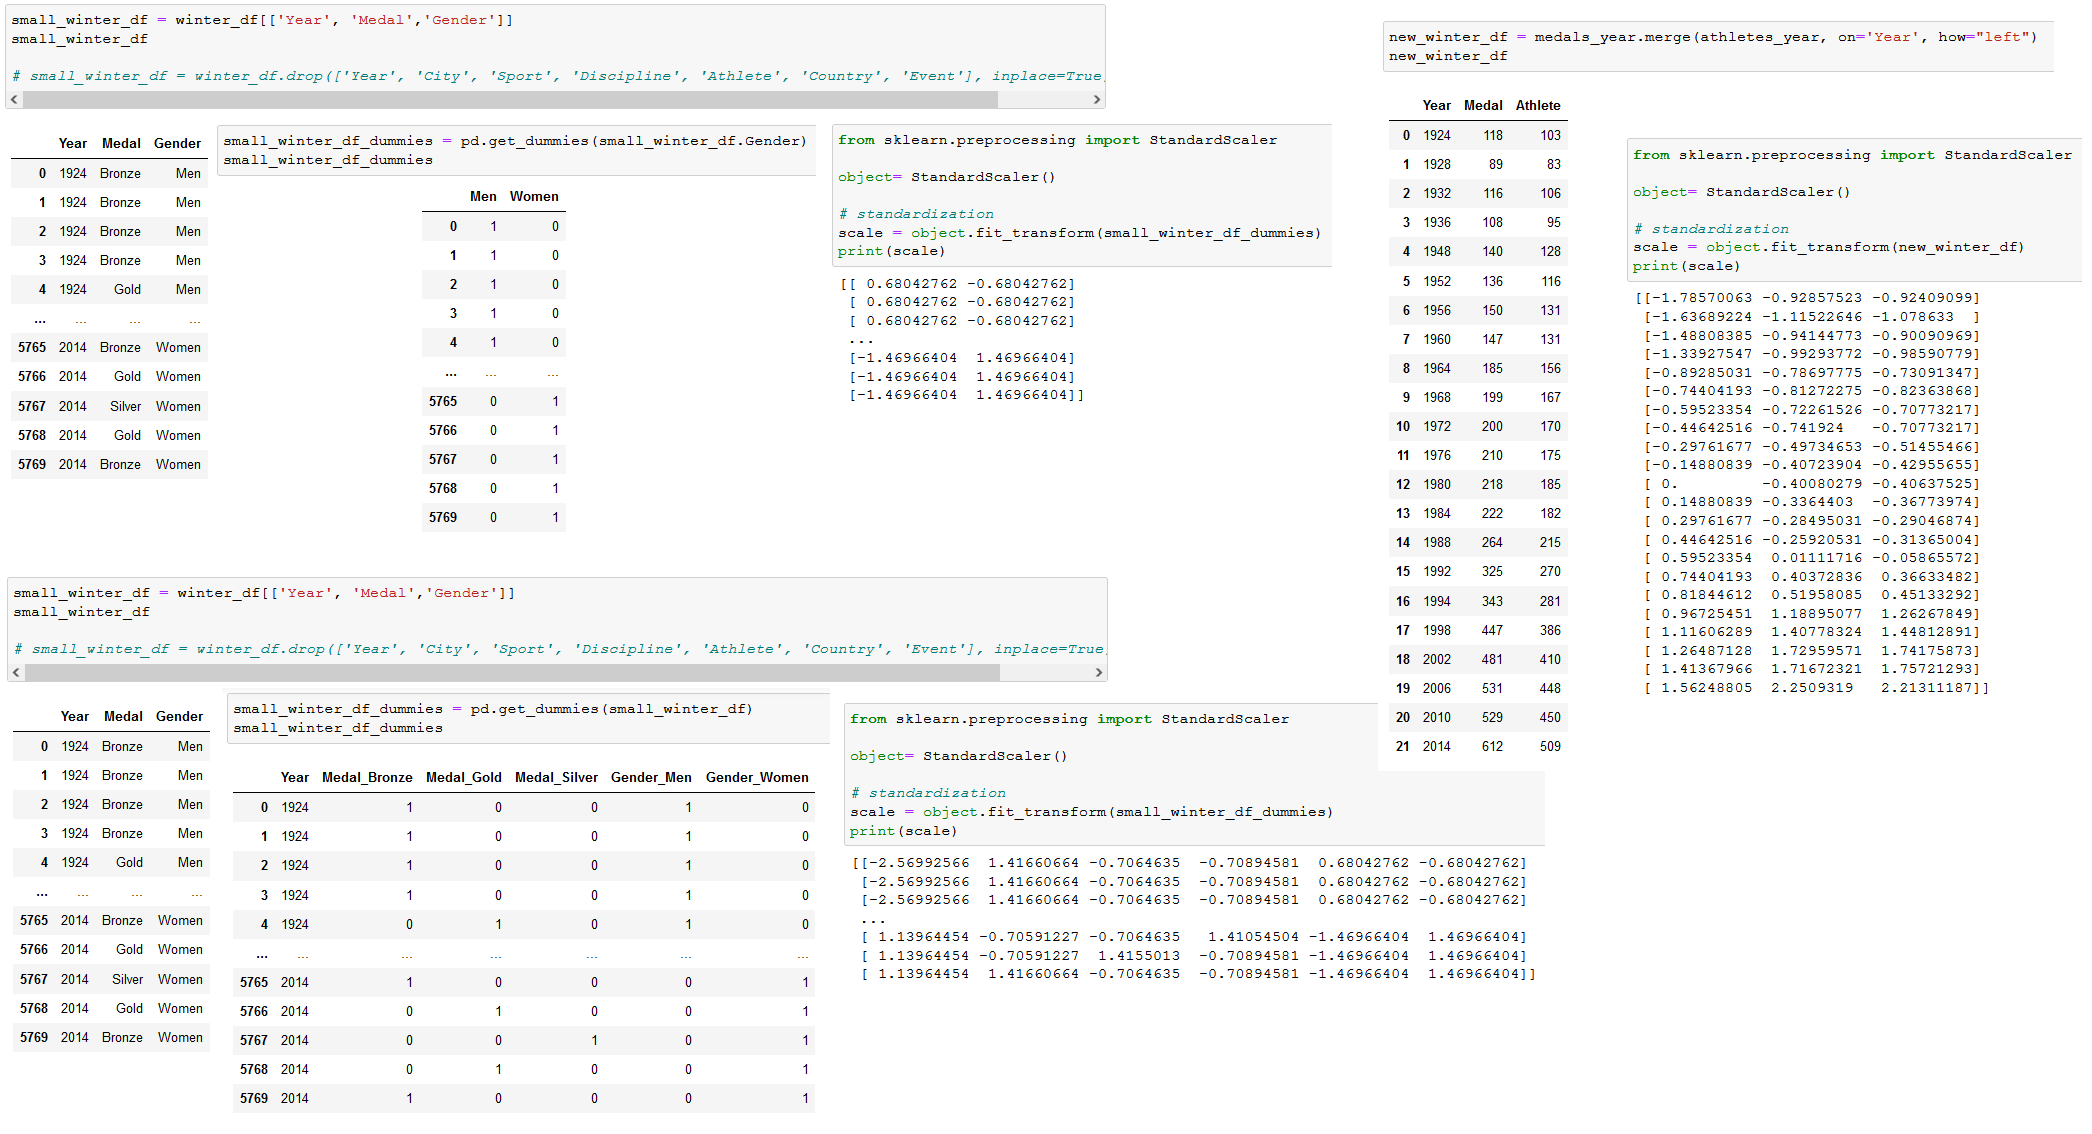

## Nivell 2
### * Exercici 2

Continua amb el conjunt de dades de tema esportiu que t'agradi i aplica l'anàlisi de components principals.

## Nivell 3
### * Exercici 3

Continua amb el conjunt de dades de tema esportiu que t'agradi i normalitza les dades tenint en compte els outliers.

BIBLIOGRAFIA:  
[Obtener Dummies en Pandas](https://www.delftstack.com/es/howto/python-pandas/get-dummies-pandas/)  
[Odio la Estadística](https://www.odiolaestadistica.com/estadistica-python/estandarizacion/)  
[Fundamentos de Estadística y Análisis de Datos con Python](https://github.com/francomanca93/fundamentos-de-estadistica-con-python)  
[Machine learning con Python y Scikit-learn](https://www.cienciadedatos.net/documentos/py06_machine_learning_python_scikitlearn.html)  
[Guide to Encoding Categorical Values in Python ](https://pbpython.com/categorical-encoding.html)